In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D,Add,MaxPooling2D, Dense, BatchNormalization,Input,Flatten, Dropout,GlobalMaxPooling2D,Lambda

from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

import wandb

2023-04-03 08:53:14.853603: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-03 08:53:14.973537: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [16]:
!pip install opendatasets
import opendatasets as od
dataset = 'https://www.kaggle.com/datasets/veeralakrishna/200-bird-species-with-11788-images'
od.download(dataset)


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  hyeongchanim


Your Kaggle Key:

  ········


100% 1.11G/1.11G [02:32<00:00, 7.79MB/s]

In [17]:
!tar xvzf ./200-bird-species-with-11788-images/CUB_200_2011.tgz

attributes.txt
CUB_200_2011/
CUB_200_2011/images/
CUB_200_2011/images/001.Black_footed_Albatross/
CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0010_796097.jpg
CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0032_796115.jpg
CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0057_796106.jpg
CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0036_796127.jpg
CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0060_796076.jpg
CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0019_796104.jpg
CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0069_796139.jpg
CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0089_796069.jpg
CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0071_796113.jpg
CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0077_796114.jpg
CUB_200_2011/images/001.Black_footed_Albat

In [2]:
dir_list = sorted(os.listdir("./CUB_200_2011/images"))
dir_list

['001.Black_footed_Albatross',
 '002.Laysan_Albatross',
 '003.Sooty_Albatross',
 '004.Groove_billed_Ani',
 '005.Crested_Auklet',
 '006.Least_Auklet',
 '007.Parakeet_Auklet',
 '008.Rhinoceros_Auklet',
 '009.Brewer_Blackbird',
 '010.Red_winged_Blackbird',
 '011.Rusty_Blackbird',
 '012.Yellow_headed_Blackbird',
 '013.Bobolink',
 '014.Indigo_Bunting',
 '015.Lazuli_Bunting',
 '016.Painted_Bunting',
 '017.Cardinal',
 '018.Spotted_Catbird',
 '019.Gray_Catbird',
 '020.Yellow_breasted_Chat',
 '021.Eastern_Towhee',
 '022.Chuck_will_Widow',
 '023.Brandt_Cormorant',
 '024.Red_faced_Cormorant',
 '025.Pelagic_Cormorant',
 '026.Bronzed_Cowbird',
 '027.Shiny_Cowbird',
 '028.Brown_Creeper',
 '029.American_Crow',
 '030.Fish_Crow',
 '031.Black_billed_Cuckoo',
 '032.Mangrove_Cuckoo',
 '033.Yellow_billed_Cuckoo',
 '034.Gray_crowned_Rosy_Finch',
 '035.Purple_Finch',
 '036.Northern_Flicker',
 '037.Acadian_Flycatcher',
 '038.Great_Crested_Flycatcher',
 '039.Least_Flycatcher',
 '040.Olive_sided_Flycatcher',
 '

In [3]:
x_train, x_test = [],[]
y_train, y_test = [],[]

for i in dir_list:
    cnt = 0 
    for j in os.listdir("./CUB_200_2011/images/"+i):
        img = plt.imread("./CUB_200_2011/images/"+i+"/"+j)
        y = int(i.split(".")[0])
        
        if cnt<9:
            x_test.append(img)
            y_test.append(y)
            cnt += 1
        else:
            x_train.append(img)
            y_train.append(y)

class: 200


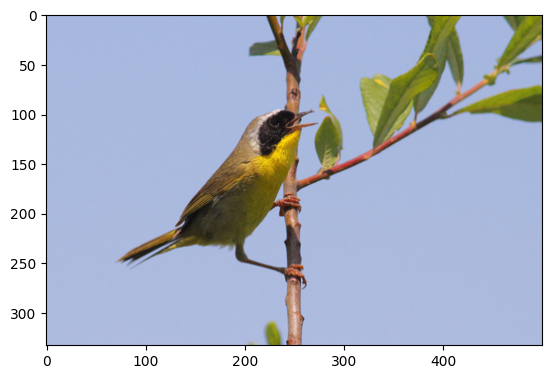

In [4]:
plt.imshow(img) 
print('class:', y)

In [5]:
def preprocessing(image):
    resized_image = tf.image.resize(image, [112,112])
    return tf.keras.applications.vgg16.preprocess_input(resized_image)
    #return tf.keras.applications.densenet.preprocess_input(resized_image)

X_train = []

for _ in x_train:
    if len(img.shape) == 3 or len(img.shape) == 4:
        img = preprocessing(img)
        X_train.append(img)
        
X_train = np.array(X_train)
y_train = np.array(y_train)
y_train = tf.keras.utils.to_categorical(y_train)



X_test = []

for _ in x_test:
    if len(img.shape) == 3 or len(img.shape) == 4:
        img = preprocessing(img)
        X_test.append(img)
        
X_test = np.array(X_test)
y_test = np.array(y_test)       
y_test = tf.keras.utils.to_categorical (y_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

2023-04-03 08:54:03.960203: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-03 08:54:03.962794: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-03 08:54:03.963090: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-03 08:54:03.963946: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

(9988, 112, 112, 3)
(9988, 201)
(1800, 112, 112, 3)
(1800, 201)


# Validation set 생성

In [6]:
from sklearn.model_selection import train_test_split

X_tn, X_val, y_tn, y_val = train_test_split(X_train, y_train, test_size=0.18, random_state=42)

In [7]:
print(X_tn.shape) 
print(y_tn.shape) 
print(X_test.shape)
print(y_test.shape)
print(X_val.shape) 
print(y_val.shape)

(8190, 112, 112, 3)
(8190, 201)
(1800, 112, 112, 3)
(1800, 201)
(1798, 112, 112, 3)
(1798, 201)


In [8]:
wandb.init(project="Bird_DenseNet", entity="hcim", name='DenseNet_SwiCh_Low_Batch')

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: chan4im (hcim). Use `wandb login --relogin` to force relogin


# DenseNet으로 Model 생성

In [9]:
def swich(x):
    x_pos = tf.nn.relu(x)
    x_neg = x * tf.math.sigmoid(x)
    return tf.where(x < 0, tf.clip_by_value(x_neg, -100, 100), x_pos)

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D,AveragePooling2D, GlobalAveragePooling2D, Flatten, Dense, Activation, MaxPool2D, BatchNormalization, Dropout,RandomFlip,RandomRotation
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten, AveragePooling2D, ReLU
from tensorflow.keras.layers import Lambda, Add


# 각 bottleneck layer 
def conv_block(x, growth_rate):
    x1 = BatchNormalization()(x)
    
    x1 = Lambda(swich)(x1)
    
    x1 = Conv2D(4 * growth_rate, (1, 1), use_bias=False, padding='same')(x1)  #1x1 conv로 input feature map을 압축해 channel수를 줄임
    x1 = BatchNormalization()(x1)
    
    x1 = Lambda(swich)(x1)
    
    x1 = Conv2D(growth_rate, (3, 3), use_bias=False, padding='same')(x1) # grow_rate출력channel로 3x3conv을 이용해 new feature map 생성
    x = tf.keras.layers.Concatenate()([x, x1])  # 원래 input feature와 새 feature map 연결
    return x

# DenseNet의 Dense block
def dense_block(x, blocks, growth_rate):  # x는 입력, blocks는 Denseblock의 layer수, growth_rate는 각 dense layer의 output feature map의 개수인 dense block의 성장률을 나타내는 float값
    for i in range(blocks):
        x = conv_block(x, growth_rate)
    return x

# dense block 뒤의 transition layer_특징맵 및 입력의 공간의 차원을 줄이기 위해 사용 
def transition_block(x, reduction):
    x = BatchNormalization()(x)
    
    x = Lambda(swich)(x)
    
    x = Conv2D(int(tf.keras.backend.int_shape(x)[3] * reduction), (1, 1), use_bias=False, padding='same')(x)  # 수치적 안정성을 향상시키기 위해 use_bias=False로 설정
    # reduction을 channel수에 곱하여 convolution계층의 출력 channel수를 만든다.(즉, 출력channel수를 제어할 수 있음)
    x = AveragePooling2D((2, 2), strides=(2, 2))(x)
    return x

# 전체적인 모델 구성
def densenet(blocks=[6, 12, 32, 32], growth_rate=32, include_top=True, weights=None, input_shape=None, classes=1000):
    inputs = Input(shape=input_shape)
    x = tf.keras.layers.ZeroPadding2D(padding=((3, 3), (3, 3)))(inputs) #출력 피처 맵이 입력과 동일한 공간 차원을 갖도록하는 zero-padding사용 => 정보손실방지
    x = Conv2D(64, (7, 7), strides=(2, 2), use_bias=False)(x)
    x = BatchNormalization()(x)
    
    x = Lambda(swich)(x)
    
    x = tf.keras.layers.ZeroPadding2D(padding=((1, 1), (1, 1)))(x) #conv층 이후에도 출력 피처 맵이 입력과 동일한 공간 차원을 갖도록하는 zero-padding사용 => 정보손실방지
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    # dense block 및 transition block 추가
    for i, num_blocks in enumerate(blocks):  # 입력한 층의 개수에 대해 접근  // (0, 6) (1, 12) (2, 32) (3, 32)
        x = dense_block(x, num_blocks, growth_rate)
        if i != len(blocks)-1: # 층의 개수에 도달하기 전까지 계속 추가 (다만 D->T->D->T->...->Dense로 끝나기에 -1을 해줘야 함)
            x = transition_block(x, 0.5)  #growth_rate를 0.5로 설정

    if include_top:
        x = GlobalAveragePooling2D()(x)
        x = Dense(classes, activation='softmax')(x)
        
    model = Model(inputs, x, name='densenet')
    return model

model = densenet(input_shape=(112,112,3), classes=201)
model.summary()

Model: "densenet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 112, 112, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 118, 118, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 56, 56, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 batch_normalization (BatchNorm  (None, 56, 56, 64)  256         ['conv2d[0][0]']          

In [11]:
from tensorflow.keras import callbacks
class WandbCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        wandb.log(logs)
        
        

from keras.preprocessing.image import ImageDataGenerator

#datagen = ImageDataGenerator(rotation_range=15, horizontal_flip=True, vertical_flip=True, brightness_range=[0.01, 0.3], channel_shift_range=30)
datagen = ImageDataGenerator(rotation_range=15, horizontal_flip=True)
datagen.fit(X_tn)

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=10e-4)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[tf.keras.metrics.CategoricalAccuracy()]) 

#hist = model.fit_generator(datagen.flow(X_tn, y_tn, batch_size=64), epochs=150, validation_data=(X_val, y_val), callbacks=[WandbCallback()])
hist = model.fit_generator(datagen.flow(X_tn, y_tn, batch_size=16), epochs=3000, validation_data=(X_val, y_val), callbacks=[WandbCallback()], use_multiprocessing=True, workers=10)

Epoch 1/3000


/tmp/ipykernel_407/1404239276.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(datagen.flow(X_tn, y_tn, batch_size=16), epochs=3000, validation_data=(X_val, y_val), callbacks=[WandbCallback()], use_multiprocessing=True, workers=10)
2023-04-03 08:56:53.400633: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape ingradient_tape/densenet/lambda_167/SelectV2_1-1-TransposeNHWCToNCHW-LayoutOptimizer


512/512 [==============================] - 76s 111ms/step - loss: 4.0831 - categorical_accuracy: 0.0346 - val_loss: 3.7647 - val_categorical_accuracy: 0.0601
Epoch 2/3000
512/512 [==============================] - 55s 105ms/step - loss: 3.7623 - categorical_accuracy: 0.0507 - val_loss: 3.4641 - val_categorical_accuracy: 0.0723
Epoch 3/3000
512/512 [==============================] - 56s 106ms/step - loss: 3.5395 - categorical_accuracy: 0.0552 - val_loss: 3.1376 - val_categorical_accuracy: 0.0779
Epoch 4/3000
512/512 [==============================] - 56s 106ms/step - loss: 3.4444 - categorical_accuracy: 0.0607 - val_loss: 3.0644 - val_categorical_accuracy: 0.0756
Epoch 5/3000
512/512 [==============================] - 56s 106ms/step - loss: 3.3689 - categorical_accuracy: 0.0657 - val_loss: 2.9595 - val_categorical_accuracy: 0.1023
Epoch 6/3000
512/512 [==============================] - 56s 106ms/step - loss: 3.3015 - categorical_accuracy: 0.0770 - val_loss: 2.8495 - val_categorical_accu

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 108ms/step - loss: 2.7954 - categorical_accuracy: 0.1498 - val_loss: 2.3332 - val_categorical_accuracy: 0.2759
Epoch 354/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7782 - categorical_accuracy: 0.1530 - val_loss: 2.3326 - val_categorical_accuracy: 0.3014
Epoch 355/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7519 - categorical_accuracy: 0.1569 - val_loss: 2.3144 - val_categorical_accuracy: 0.3126
Epoch 356/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7710 - categorical_accuracy: 0.1626 - val_loss: 2.5396 - val_categorical_accuracy: 0.2508
Epoch 357/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7822 - categorical_accuracy: 0.1574 - val_loss: 2.5260 - val_categorical_accuracy: 0.2564
Epoch 358/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7267 - categorical_accuracy: 0.1584 - val_loss: 2.3074 - val_catego

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 108ms/step - loss: 2.7237 - categorical_accuracy: 0.1631 - val_loss: 2.3486 - val_categorical_accuracy: 0.2697
Epoch 396/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7676 - categorical_accuracy: 0.1626 - val_loss: 2.4372 - val_categorical_accuracy: 0.2770
Epoch 397/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7327 - categorical_accuracy: 0.1709 - val_loss: 2.3523 - val_categorical_accuracy: 0.2770
Epoch 398/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7635 - categorical_accuracy: 0.1637 - val_loss: 2.4048 - val_categorical_accuracy: 0.2820
Epoch 401/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7188 - categorical_accuracy: 0.1654 - val_loss: 2.3012 - val_categorical_accuracy: 0.3014
Epoch 402/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7559 - categorical_accuracy: 0.1624 - val_loss: 2.3908 - val_catego

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 56s 107ms/step - loss: 2.7660 - categorical_accuracy: 0.1608 - val_loss: 2.3857 - val_categorical_accuracy: 0.2820
Epoch 418/3000
512/512 [==============================] - 56s 107ms/step - loss: 2.7867 - categorical_accuracy: 0.1620 - val_loss: 2.4342 - val_categorical_accuracy: 0.2692
Epoch 419/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7287 - categorical_accuracy: 0.1626 - val_loss: 2.5414 - val_categorical_accuracy: 0.2275
Epoch 420/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7530 - categorical_accuracy: 0.1620 - val_loss: 2.4325 - val_categorical_accuracy: 0.2280
Epoch 421/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7799 - categorical_accuracy: 0.1510 - val_loss: 2.4390 - val_categorical_accuracy: 0.2798
Epoch 422/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7648 - categorical_accuracy: 0.1573 - val_loss: 2.5036 - val_catego

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 107ms/step - loss: 2.7268 - categorical_accuracy: 0.1562 - val_loss: 2.3615 - val_categorical_accuracy: 0.2970
Epoch 448/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7493 - categorical_accuracy: 0.1624 - val_loss: 2.3651 - val_categorical_accuracy: 0.2859
Epoch 449/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7684 - categorical_accuracy: 0.1662 - val_loss: 2.4939 - val_categorical_accuracy: 0.2514
Epoch 450/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7971 - categorical_accuracy: 0.1513 - val_loss: 2.4297 - val_categorical_accuracy: 0.2809
Epoch 451/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7602 - categorical_accuracy: 0.1578 - val_loss: 2.2650 - val_categorical_accuracy: 0.2981
Epoch 452/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7457 - categorical_accuracy: 0.1662 - val_loss: 2.4165 - val_catego

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 108ms/step - loss: 2.7771 - categorical_accuracy: 0.1651 - val_loss: 2.3911 - val_categorical_accuracy: 0.2903
Epoch 491/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7518 - categorical_accuracy: 0.1612 - val_loss: 2.5314 - val_categorical_accuracy: 0.2364
Epoch 492/3000
512/512 [==============================] - 58s 109ms/step - loss: 2.7924 - categorical_accuracy: 0.1595 - val_loss: 2.4507 - val_categorical_accuracy: 0.2970
Epoch 493/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7205 - categorical_accuracy: 0.1631 - val_loss: 2.3434 - val_categorical_accuracy: 0.3037
Epoch 495/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7808 - categorical_accuracy: 0.1628 - val_loss: 2.3776 - val_categorical_accuracy: 0.2647
Epoch 496/3000
512/512 [==============================] - 58s 109ms/step - loss: 2.7199 - categorical_accuracy: 0.1525 - val_loss: 2.3606 - val_catego

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 107ms/step - loss: 2.7651 - categorical_accuracy: 0.1542 - val_loss: 2.3224 - val_categorical_accuracy: 0.3087
Epoch 510/3000
512/512 [==============================] - 57s 109ms/step - loss: 2.7508 - categorical_accuracy: 0.1691 - val_loss: 2.5089 - val_categorical_accuracy: 0.2041
Epoch 511/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7658 - categorical_accuracy: 0.1612 - val_loss: 2.3905 - val_categorical_accuracy: 0.2925
Epoch 512/3000
512/512 [==============================] - 58s 109ms/step - loss: 2.8196 - categorical_accuracy: 0.1466 - val_loss: 2.3637 - val_categorical_accuracy: 0.3437
Epoch 513/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7828 - categorical_accuracy: 0.1623 - val_loss: 2.7314 - val_categorical_accuracy: 0.1919
Epoch 514/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7518 - categorical_accuracy: 0.1646 - val_loss: 2.5022 - val_catego

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 107ms/step - loss: 2.8112 - categorical_accuracy: 0.1507 - val_loss: 2.3890 - val_categorical_accuracy: 0.2892
Epoch 535/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7975 - categorical_accuracy: 0.1527 - val_loss: 2.5240 - val_categorical_accuracy: 0.2720
Epoch 536/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7426 - categorical_accuracy: 0.1573 - val_loss: 2.5153 - val_categorical_accuracy: 0.2458
Epoch 537/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7989 - categorical_accuracy: 0.1565 - val_loss: 2.4267 - val_categorical_accuracy: 0.2525
Epoch 538/3000
512/512 [==============================] - 57s 109ms/step - loss: 2.6811 - categorical_accuracy: 0.1764 - val_loss: 2.3883 - val_categorical_accuracy: 0.2592
Epoch 539/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7621 - categorical_accuracy: 0.1664 - val_loss: 2.4617 - val_catego

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 108ms/step - loss: 2.7632 - categorical_accuracy: 0.1634 - val_loss: 2.4426 - val_categorical_accuracy: 0.2959
Epoch 563/3000
512/512 [==============================] - 57s 109ms/step - loss: 2.7853 - categorical_accuracy: 0.1653 - val_loss: 2.4020 - val_categorical_accuracy: 0.2981
Epoch 566/3000
512/512 [==============================] - 58s 109ms/step - loss: 2.7332 - categorical_accuracy: 0.1597 - val_loss: 2.4760 - val_categorical_accuracy: 0.2469
Epoch 567/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7700 - categorical_accuracy: 0.1680 - val_loss: 2.3204 - val_categorical_accuracy: 0.3154
Epoch 568/3000
512/512 [==============================] - 57s 109ms/step - loss: 2.7365 - categorical_accuracy: 0.1606 - val_loss: 2.4526 - val_categorical_accuracy: 0.2319
Epoch 569/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7772 - categorical_accuracy: 0.1576 - val_loss: 2.3890 - val_catego

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 108ms/step - loss: 2.7561 - categorical_accuracy: 0.1618 - val_loss: 2.3275 - val_categorical_accuracy: 0.3053
Epoch 582/3000
512/512 [==============================] - 56s 107ms/step - loss: 2.7405 - categorical_accuracy: 0.1589 - val_loss: 2.4522 - val_categorical_accuracy: 0.2820
Epoch 583/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7365 - categorical_accuracy: 0.1596 - val_loss: 2.4209 - val_categorical_accuracy: 0.2458
Epoch 586/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7265 - categorical_accuracy: 0.1681 - val_loss: 2.3793 - val_categorical_accuracy: 0.2992
Epoch 587/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7578 - categorical_accuracy: 0.1774 - val_loss: 2.4769 - val_categorical_accuracy: 0.2747
Epoch 588/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.6904 - categorical_accuracy: 0.1711 - val_loss: 2.2894 - val_catego

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 107ms/step - loss: 2.7339 - categorical_accuracy: 0.1575 - val_loss: 2.4497 - val_categorical_accuracy: 0.2953
Epoch 602/3000
512/512 [==============================] - 57s 109ms/step - loss: 2.7524 - categorical_accuracy: 0.1543 - val_loss: 2.4836 - val_categorical_accuracy: 0.2353
Epoch 603/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7249 - categorical_accuracy: 0.1557 - val_loss: 2.4573 - val_categorical_accuracy: 0.2180
Epoch 604/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7282 - categorical_accuracy: 0.1680 - val_loss: 2.4069 - val_categorical_accuracy: 0.2981
Epoch 607/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7270 - categorical_accuracy: 0.1651 - val_loss: 2.3666 - val_categorical_accuracy: 0.2881
Epoch 608/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7547 - categorical_accuracy: 0.1681 - val_loss: 2.6220 - val_catego

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 108ms/step - loss: 2.6964 - categorical_accuracy: 0.1687 - val_loss: 2.4334 - val_categorical_accuracy: 0.2881
Epoch 621/3000
512/512 [==============================] - 58s 109ms/step - loss: 2.7033 - categorical_accuracy: 0.1720 - val_loss: 2.3912 - val_categorical_accuracy: 0.2764
Epoch 622/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.8071 - categorical_accuracy: 0.1620 - val_loss: 2.5346 - val_categorical_accuracy: 0.2608
Epoch 623/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7477 - categorical_accuracy: 0.1586 - val_loss: 2.4180 - val_categorical_accuracy: 0.2948
Epoch 624/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7734 - categorical_accuracy: 0.1563 - val_loss: 2.3867 - val_categorical_accuracy: 0.2581
Epoch 625/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7296 - categorical_accuracy: 0.1614 - val_loss: 2.3160 - val_catego

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 58s 109ms/step - loss: 2.7461 - categorical_accuracy: 0.1626 - val_loss: 2.3215 - val_categorical_accuracy: 0.3109
Epoch 660/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7111 - categorical_accuracy: 0.1681 - val_loss: 2.4199 - val_categorical_accuracy: 0.2519
Epoch 661/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7922 - categorical_accuracy: 0.1598 - val_loss: 2.3723 - val_categorical_accuracy: 0.3031
Epoch 662/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7021 - categorical_accuracy: 0.1695 - val_loss: 2.3435 - val_categorical_accuracy: 0.2976
Epoch 663/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7552 - categorical_accuracy: 0.1657 - val_loss: 2.3813 - val_categorical_accuracy: 0.2786
Epoch 664/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7047 - categorical_accuracy: 0.1685 - val_loss: 2.3547 - val_catego

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Epoch 682/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7356 - categorical_accuracy: 0.1582 - val_loss: 2.3725 - val_categorical_accuracy: 0.2369
Epoch 683/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7472 - categorical_accuracy: 0.1619 - val_loss: 2.4012 - val_categorical_accuracy: 0.2853
Epoch 686/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.6787 - categorical_accuracy: 0.1694 - val_loss: 2.4060 - val_categorical_accuracy: 0.2781
Epoch 687/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.6912 - categorical_accuracy: 0.1756 - val_loss: 2.3394 - val_categorical_accuracy: 0.2892
Epoch 688/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7773 - categorical_accuracy: 0.1618 - val_loss: 2.3446 - val_categorical_accuracy: 0.2953
Epoch 689/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7473 - categorical_accuracy: 0.1684 - val_loss: 2.41

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 56s 107ms/step - loss: 2.7407 - categorical_accuracy: 0.1604 - val_loss: 2.4267 - val_categorical_accuracy: 0.2764
Epoch 703/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7301 - categorical_accuracy: 0.1667 - val_loss: 2.3187 - val_categorical_accuracy: 0.3192
Epoch 706/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7179 - categorical_accuracy: 0.1667 - val_loss: 2.3902 - val_categorical_accuracy: 0.2586
Epoch 707/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7369 - categorical_accuracy: 0.1626 - val_loss: 2.4055 - val_categorical_accuracy: 0.2764
Epoch 708/3000
512/512 [==============================] - 56s 107ms/step - loss: 2.7891 - categorical_accuracy: 0.1571 - val_loss: 2.5040 - val_categorical_accuracy: 0.2848
Epoch 709/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7439 - categorical_accuracy: 0.1662 - val_loss: 2.4122 - val_catego

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 108ms/step - loss: 2.7184 - categorical_accuracy: 0.1709 - val_loss: 2.3859 - val_categorical_accuracy: 0.2859
Epoch 722/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7175 - categorical_accuracy: 0.1716 - val_loss: 2.3647 - val_categorical_accuracy: 0.3037
Epoch 723/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7559 - categorical_accuracy: 0.1630 - val_loss: 2.3746 - val_categorical_accuracy: 0.2747
Epoch 726/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7401 - categorical_accuracy: 0.1674 - val_loss: 2.3817 - val_categorical_accuracy: 0.3059
Epoch 727/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7377 - categorical_accuracy: 0.1596 - val_loss: 2.4528 - val_categorical_accuracy: 0.2492
Epoch 728/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7203 - categorical_accuracy: 0.1707 - val_loss: 2.3253 - val_catego

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 108ms/step - loss: 2.7197 - categorical_accuracy: 0.1674 - val_loss: 2.3994 - val_categorical_accuracy: 0.2670
Epoch 742/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7757 - categorical_accuracy: 0.1596 - val_loss: 2.3992 - val_categorical_accuracy: 0.3037
Epoch 743/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7251 - categorical_accuracy: 0.1678 - val_loss: 2.5839 - val_categorical_accuracy: 0.2125
Epoch 744/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.6648 - categorical_accuracy: 0.1684 - val_loss: 2.4305 - val_categorical_accuracy: 0.2386
Epoch 745/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.6792 - categorical_accuracy: 0.1683 - val_loss: 2.3154 - val_categorical_accuracy: 0.2987
Epoch 746/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7251 - categorical_accuracy: 0.1632 - val_loss: 2.4552 - val_catego

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 56s 107ms/step - loss: 2.7291 - categorical_accuracy: 0.1652 - val_loss: 2.5619 - val_categorical_accuracy: 0.2308
Epoch 758/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7137 - categorical_accuracy: 0.1673 - val_loss: 2.4450 - val_categorical_accuracy: 0.2447
Epoch 759/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7154 - categorical_accuracy: 0.1642 - val_loss: 2.3378 - val_categorical_accuracy: 0.3087
Epoch 760/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7259 - categorical_accuracy: 0.1675 - val_loss: 2.3836 - val_categorical_accuracy: 0.2692
Epoch 761/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.6875 - categorical_accuracy: 0.1728 - val_loss: 2.4114 - val_categorical_accuracy: 0.2631
Epoch 763/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.6894 - categorical_accuracy: 0.1689 - val_loss: 2.3195 - val_catego

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 108ms/step - loss: 2.7470 - categorical_accuracy: 0.1654 - val_loss: 2.3143 - val_categorical_accuracy: 0.3181
Epoch 779/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7086 - categorical_accuracy: 0.1639 - val_loss: 2.4278 - val_categorical_accuracy: 0.2770
Epoch 780/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7060 - categorical_accuracy: 0.1668 - val_loss: 2.4887 - val_categorical_accuracy: 0.2798
Epoch 781/3000
512/512 [==============================] - 56s 107ms/step - loss: 2.7377 - categorical_accuracy: 0.1642 - val_loss: 2.4056 - val_categorical_accuracy: 0.2942
Epoch 782/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.6738 - categorical_accuracy: 0.1712 - val_loss: 2.3545 - val_categorical_accuracy: 0.3026
Epoch 783/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.6754 - categorical_accuracy: 0.1664 - val_loss: 2.5148 - val_catego

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 107ms/step - loss: 2.7659 - categorical_accuracy: 0.1571 - val_loss: 2.3956 - val_categorical_accuracy: 0.2914
Epoch 806/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7095 - categorical_accuracy: 0.1630 - val_loss: 2.4049 - val_categorical_accuracy: 0.2853
Epoch 807/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7039 - categorical_accuracy: 0.1708 - val_loss: 2.3619 - val_categorical_accuracy: 0.2887
Epoch 808/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.6733 - categorical_accuracy: 0.1678 - val_loss: 2.3219 - val_categorical_accuracy: 0.3020
Epoch 809/3000
512/512 [==============================] - 56s 107ms/step - loss: 2.7080 - categorical_accuracy: 0.1625 - val_loss: 2.4332 - val_categorical_accuracy: 0.2881
Epoch 810/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7766 - categorical_accuracy: 0.1669 - val_loss: 2.3892 - val_catego

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 108ms/step - loss: 2.6779 - categorical_accuracy: 0.1746 - val_loss: 2.3408 - val_categorical_accuracy: 0.3026
Epoch 835/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7612 - categorical_accuracy: 0.1702 - val_loss: 2.3345 - val_categorical_accuracy: 0.3176
Epoch 838/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7058 - categorical_accuracy: 0.1708 - val_loss: 2.3713 - val_categorical_accuracy: 0.2714
Epoch 839/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7030 - categorical_accuracy: 0.1694 - val_loss: 2.4206 - val_categorical_accuracy: 0.2720
Epoch 840/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7610 - categorical_accuracy: 0.1653 - val_loss: 2.4898 - val_categorical_accuracy: 0.3131
Epoch 841/3000
512/512 [==============================] - 56s 107ms/step - loss: 2.6896 - categorical_accuracy: 0.1690 - val_loss: 2.3981 - val_catego

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 107ms/step - loss: 2.7403 - categorical_accuracy: 0.1636 - val_loss: 2.4603 - val_categorical_accuracy: 0.3098
Epoch 853/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7389 - categorical_accuracy: 0.1578 - val_loss: 2.3651 - val_categorical_accuracy: 0.3115
Epoch 854/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7230 - categorical_accuracy: 0.1675 - val_loss: 2.3595 - val_categorical_accuracy: 0.3137
Epoch 855/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7020 - categorical_accuracy: 0.1626 - val_loss: 2.3477 - val_categorical_accuracy: 0.3281
Epoch 856/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7305 - categorical_accuracy: 0.1618 - val_loss: 2.4222 - val_categorical_accuracy: 0.3154
Epoch 857/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7171 - categorical_accuracy: 0.1665 - val_loss: 2.4198 - val_catego

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 108ms/step - loss: 2.7153 - categorical_accuracy: 0.1684 - val_loss: 2.2923 - val_categorical_accuracy: 0.3304
Epoch 881/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7031 - categorical_accuracy: 0.1744 - val_loss: 2.4985 - val_categorical_accuracy: 0.2386
Epoch 882/3000
512/512 [==============================] - 56s 107ms/step - loss: 2.7292 - categorical_accuracy: 0.1615 - val_loss: 2.3550 - val_categorical_accuracy: 0.2948
Epoch 884/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7398 - categorical_accuracy: 0.1683 - val_loss: 2.4307 - val_categorical_accuracy: 0.2736
Epoch 885/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7303 - categorical_accuracy: 0.1719 - val_loss: 2.3939 - val_categorical_accuracy: 0.3070
Epoch 886/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7455 - categorical_accuracy: 0.1695 - val_loss: 2.3798 - val_catego

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 107ms/step - loss: 2.7325 - categorical_accuracy: 0.1626 - val_loss: 2.3448 - val_categorical_accuracy: 0.3187
Epoch 900/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7375 - categorical_accuracy: 0.1672 - val_loss: 2.2784 - val_categorical_accuracy: 0.3187
Epoch 901/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7631 - categorical_accuracy: 0.1687 - val_loss: 2.3758 - val_categorical_accuracy: 0.3098
Epoch 902/3000
512/512 [==============================] - 56s 107ms/step - loss: 2.7319 - categorical_accuracy: 0.1668 - val_loss: 2.4798 - val_categorical_accuracy: 0.2836
Epoch 903/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7092 - categorical_accuracy: 0.1708 - val_loss: 2.4202 - val_categorical_accuracy: 0.2786
Epoch 904/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7670 - categorical_accuracy: 0.1667 - val_loss: 2.3319 - val_catego

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 108ms/step - loss: 2.7109 - categorical_accuracy: 0.1675 - val_loss: 2.3546 - val_categorical_accuracy: 0.2931
Epoch 930/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7045 - categorical_accuracy: 0.1777 - val_loss: 2.4421 - val_categorical_accuracy: 0.2492
Epoch 931/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7151 - categorical_accuracy: 0.1667 - val_loss: 2.4411 - val_categorical_accuracy: 0.2836
Epoch 932/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7887 - categorical_accuracy: 0.1575 - val_loss: 2.3462 - val_categorical_accuracy: 0.3192
Epoch 935/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7117 - categorical_accuracy: 0.1662 - val_loss: 2.3901 - val_categorical_accuracy: 0.2759
Epoch 936/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7193 - categorical_accuracy: 0.1726 - val_loss: 2.3266 - val_catego

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 108ms/step - loss: 2.7799 - categorical_accuracy: 0.1631 - val_loss: 2.3224 - val_categorical_accuracy: 0.3543
Epoch 952/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7539 - categorical_accuracy: 0.1665 - val_loss: 2.4048 - val_categorical_accuracy: 0.2642
Epoch 953/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.6711 - categorical_accuracy: 0.1736 - val_loss: 2.3582 - val_categorical_accuracy: 0.3154
Epoch 954/3000
512/512 [==============================] - 56s 107ms/step - loss: 2.8028 - categorical_accuracy: 0.1593 - val_loss: 2.3812 - val_categorical_accuracy: 0.3187
Epoch 955/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7151 - categorical_accuracy: 0.1634 - val_loss: 2.3578 - val_categorical_accuracy: 0.3142
Epoch 956/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7243 - categorical_accuracy: 0.1777 - val_loss: 2.3439 - val_catego

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 107ms/step - loss: 2.7373 - categorical_accuracy: 0.1667 - val_loss: 2.3432 - val_categorical_accuracy: 0.3103
Epoch 985/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7287 - categorical_accuracy: 0.1614 - val_loss: 2.3695 - val_categorical_accuracy: 0.3059
Epoch 986/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7652 - categorical_accuracy: 0.1713 - val_loss: 2.4126 - val_categorical_accuracy: 0.2998
Epoch 987/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7082 - categorical_accuracy: 0.1739 - val_loss: 2.4949 - val_categorical_accuracy: 0.2942
Epoch 988/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.6931 - categorical_accuracy: 0.1739 - val_loss: 2.3073 - val_categorical_accuracy: 0.3176
Epoch 989/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7893 - categorical_accuracy: 0.1661 - val_loss: 2.5275 - val_catego

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 107ms/step - loss: 2.7765 - categorical_accuracy: 0.1681 - val_loss: 2.3549 - val_categorical_accuracy: 0.3165
Epoch 1011/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.6945 - categorical_accuracy: 0.1617 - val_loss: 2.4473 - val_categorical_accuracy: 0.2842
Epoch 1012/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.6864 - categorical_accuracy: 0.1730 - val_loss: 2.3779 - val_categorical_accuracy: 0.3159
Epoch 1013/3000
512/512 [==============================] - 56s 107ms/step - loss: 2.7215 - categorical_accuracy: 0.1643 - val_loss: 2.2820 - val_categorical_accuracy: 0.3103
Epoch 1014/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.6990 - categorical_accuracy: 0.1695 - val_loss: 2.3537 - val_categorical_accuracy: 0.3137
Epoch 1015/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.6773 - categorical_accuracy: 0.1713 - val_loss: 2.3479 - val_c

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 108ms/step - loss: 2.7627 - categorical_accuracy: 0.1723 - val_loss: 2.3236 - val_categorical_accuracy: 0.3304
Epoch 1041/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7304 - categorical_accuracy: 0.1709 - val_loss: 2.4295 - val_categorical_accuracy: 0.2747
Epoch 1042/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7003 - categorical_accuracy: 0.1684 - val_loss: 2.4669 - val_categorical_accuracy: 0.2881
Epoch 1043/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7804 - categorical_accuracy: 0.1608 - val_loss: 2.3390 - val_categorical_accuracy: 0.3348
Epoch 1044/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7772 - categorical_accuracy: 0.1564 - val_loss: 2.3539 - val_categorical_accuracy: 0.3254
Epoch 1045/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7987 - categorical_accuracy: 0.1567 - val_loss: 2.4104 - val_c

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 108ms/step - loss: 2.7353 - categorical_accuracy: 0.1762 - val_loss: 2.4174 - val_categorical_accuracy: 0.2953
Epoch 1065/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7151 - categorical_accuracy: 0.1718 - val_loss: 2.3426 - val_categorical_accuracy: 0.3142
Epoch 1066/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.6860 - categorical_accuracy: 0.1717 - val_loss: 2.3572 - val_categorical_accuracy: 0.2998
Epoch 1067/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7352 - categorical_accuracy: 0.1674 - val_loss: 2.4577 - val_categorical_accuracy: 0.2898
Epoch 1068/3000
512/512 [==============================] - 57s 109ms/step - loss: 2.7193 - categorical_accuracy: 0.1731 - val_loss: 2.3680 - val_categorical_accuracy: 0.3137
Epoch 1069/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7419 - categorical_accuracy: 0.1770 - val_loss: 2.3786 - val_c

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 108ms/step - loss: 2.7312 - categorical_accuracy: 0.1758 - val_loss: 2.3609 - val_categorical_accuracy: 0.3242
Epoch 1083/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7380 - categorical_accuracy: 0.1722 - val_loss: 2.3453 - val_categorical_accuracy: 0.3270
Epoch 1084/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7250 - categorical_accuracy: 0.1681 - val_loss: 2.3947 - val_categorical_accuracy: 0.3181
Epoch 1085/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7234 - categorical_accuracy: 0.1775 - val_loss: 2.3026 - val_categorical_accuracy: 0.3159
Epoch 1086/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7679 - categorical_accuracy: 0.1761 - val_loss: 2.3477 - val_categorical_accuracy: 0.3087
Epoch 1087/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.6967 - categorical_accuracy: 0.1723 - val_loss: 2.4927 - val_c

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 58s 110ms/step - loss: 2.7718 - categorical_accuracy: 0.1560 - val_loss: 2.4140 - val_categorical_accuracy: 0.3148
Epoch 1289/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7067 - categorical_accuracy: 0.1652 - val_loss: 2.3748 - val_categorical_accuracy: 0.2981
Epoch 1290/3000
512/512 [==============================] - 57s 109ms/step - loss: 2.7506 - categorical_accuracy: 0.1674 - val_loss: 2.3070 - val_categorical_accuracy: 0.3131
Epoch 1291/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7018 - categorical_accuracy: 0.1823 - val_loss: 2.3550 - val_categorical_accuracy: 0.3192
Epoch 1292/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.6579 - categorical_accuracy: 0.1752 - val_loss: 2.3289 - val_categorical_accuracy: 0.2820
Epoch 1293/3000
512/512 [==============================] - 58s 109ms/step - loss: 2.7185 - categorical_accuracy: 0.1791 - val_loss: 2.3520 - val_c

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 108ms/step - loss: 2.6724 - categorical_accuracy: 0.1789 - val_loss: 2.4739 - val_categorical_accuracy: 0.2542
Epoch 1312/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7113 - categorical_accuracy: 0.1740 - val_loss: 2.2809 - val_categorical_accuracy: 0.3270
Epoch 1314/3000
512/512 [==============================] - 58s 109ms/step - loss: 2.7674 - categorical_accuracy: 0.1651 - val_loss: 2.3239 - val_categorical_accuracy: 0.3254
Epoch 1315/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7548 - categorical_accuracy: 0.1650 - val_loss: 2.2856 - val_categorical_accuracy: 0.3382
Epoch 1316/3000
512/512 [==============================] - 57s 109ms/step - loss: 2.7934 - categorical_accuracy: 0.1625 - val_loss: 2.3567 - val_categorical_accuracy: 0.3020
Epoch 1317/3000
512/512 [==============================] - 57s 109ms/step - loss: 2.7118 - categorical_accuracy: 0.1714 - val_loss: 2.4111 - val_c

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 58s 109ms/step - loss: 2.7796 - categorical_accuracy: 0.1674 - val_loss: 2.3916 - val_categorical_accuracy: 0.3159
Epoch 1331/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7385 - categorical_accuracy: 0.1683 - val_loss: 2.2639 - val_categorical_accuracy: 0.3304
Epoch 1332/3000
512/512 [==============================] - 58s 108ms/step - loss: 2.7284 - categorical_accuracy: 0.1731 - val_loss: 2.3468 - val_categorical_accuracy: 0.3187
Epoch 1333/3000
512/512 [==============================] - 57s 109ms/step - loss: 2.7596 - categorical_accuracy: 0.1661 - val_loss: 2.3047 - val_categorical_accuracy: 0.3315
Epoch 1334/3000
512/512 [==============================] - 58s 109ms/step - loss: 2.6374 - categorical_accuracy: 0.1808 - val_loss: 2.3432 - val_categorical_accuracy: 0.2920
Epoch 1335/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7053 - categorical_accuracy: 0.1686 - val_loss: 2.3357 - val_c

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 58s 109ms/step - loss: 2.7084 - categorical_accuracy: 0.1794 - val_loss: 2.4373 - val_categorical_accuracy: 0.3109
Epoch 1349/3000
512/512 [==============================] - 57s 109ms/step - loss: 2.7347 - categorical_accuracy: 0.1689 - val_loss: 2.3451 - val_categorical_accuracy: 0.3242
Epoch 1350/3000
512/512 [==============================] - 58s 109ms/step - loss: 2.7497 - categorical_accuracy: 0.1680 - val_loss: 2.2904 - val_categorical_accuracy: 0.3304
Epoch 1351/3000
512/512 [==============================] - 57s 109ms/step - loss: 2.7324 - categorical_accuracy: 0.1647 - val_loss: 2.4594 - val_categorical_accuracy: 0.3009
Epoch 1352/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7091 - categorical_accuracy: 0.1764 - val_loss: 2.5115 - val_categorical_accuracy: 0.2931
Epoch 1353/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7028 - categorical_accuracy: 0.1832 - val_loss: 2.3957 - val_c

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 58s 110ms/step - loss: 2.7088 - categorical_accuracy: 0.1753 - val_loss: 2.3895 - val_categorical_accuracy: 0.3120
Epoch 1376/3000
512/512 [==============================] - 58s 110ms/step - loss: 2.6405 - categorical_accuracy: 0.1822 - val_loss: 2.2902 - val_categorical_accuracy: 0.3076
Epoch 1377/3000
512/512 [==============================] - 58s 109ms/step - loss: 2.7576 - categorical_accuracy: 0.1724 - val_loss: 2.2937 - val_categorical_accuracy: 0.3448
Epoch 1378/3000
512/512 [==============================] - 58s 109ms/step - loss: 2.6972 - categorical_accuracy: 0.1745 - val_loss: 2.2777 - val_categorical_accuracy: 0.3326
Epoch 1379/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7151 - categorical_accuracy: 0.1805 - val_loss: 2.3407 - val_categorical_accuracy: 0.3220
Epoch 1380/3000
512/512 [==============================] - 58s 110ms/step - loss: 2.7009 - categorical_accuracy: 0.1725 - val_loss: 2.3476 - val_c

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 108ms/step - loss: 2.7518 - categorical_accuracy: 0.1689 - val_loss: 2.2717 - val_categorical_accuracy: 0.3170
Epoch 1407/3000
512/512 [==============================] - 58s 109ms/step - loss: 2.7020 - categorical_accuracy: 0.1818 - val_loss: 2.3754 - val_categorical_accuracy: 0.3231
Epoch 1408/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.6848 - categorical_accuracy: 0.1668 - val_loss: 2.3375 - val_categorical_accuracy: 0.3187
Epoch 1409/3000
512/512 [==============================] - 58s 109ms/step - loss: 2.7069 - categorical_accuracy: 0.1731 - val_loss: 2.2586 - val_categorical_accuracy: 0.3237
Epoch 1410/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7272 - categorical_accuracy: 0.1719 - val_loss: 2.2651 - val_categorical_accuracy: 0.2964
Epoch 1411/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7146 - categorical_accuracy: 0.1750 - val_loss: 2.3755 - val_c

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 58s 110ms/step - loss: 2.7705 - categorical_accuracy: 0.1692 - val_loss: 2.3463 - val_categorical_accuracy: 0.3382
Epoch 1432/3000
512/512 [==============================] - 58s 110ms/step - loss: 2.7000 - categorical_accuracy: 0.1729 - val_loss: 2.3403 - val_categorical_accuracy: 0.3226
Epoch 1433/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.6485 - categorical_accuracy: 0.1764 - val_loss: 2.3777 - val_categorical_accuracy: 0.2909
Epoch 1434/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7349 - categorical_accuracy: 0.1646 - val_loss: 2.3743 - val_categorical_accuracy: 0.3187
Epoch 1437/3000
512/512 [==============================] - 58s 109ms/step - loss: 2.7128 - categorical_accuracy: 0.1875 - val_loss: 2.3603 - val_categorical_accuracy: 0.3170
Epoch 1438/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7309 - categorical_accuracy: 0.1663 - val_loss: 2.2775 - val_c

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 109ms/step - loss: 2.6683 - categorical_accuracy: 0.1764 - val_loss: 2.4124 - val_categorical_accuracy: 0.2959
Epoch 1454/3000
512/512 [==============================] - 58s 109ms/step - loss: 2.6863 - categorical_accuracy: 0.1751 - val_loss: 2.4102 - val_categorical_accuracy: 0.2803
Epoch 1455/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7271 - categorical_accuracy: 0.1692 - val_loss: 2.2716 - val_categorical_accuracy: 0.3270
Epoch 1456/3000
512/512 [==============================] - 58s 109ms/step - loss: 2.7314 - categorical_accuracy: 0.1630 - val_loss: 2.2851 - val_categorical_accuracy: 0.3159
Epoch 1457/3000
512/512 [==============================] - 58s 109ms/step - loss: 2.7314 - categorical_accuracy: 0.1735 - val_loss: 2.2997 - val_categorical_accuracy: 0.3254
Epoch 1458/3000
434/512 [========================>.....] - ETA: 7s - loss: 2.7274 - categorical_accuracy: 0.1749

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 58s 109ms/step - loss: 2.7012 - categorical_accuracy: 0.1758 - val_loss: 2.3110 - val_categorical_accuracy: 0.3259
Epoch 1465/3000
512/512 [==============================] - 58s 109ms/step - loss: 2.7249 - categorical_accuracy: 0.1687 - val_loss: 2.3384 - val_categorical_accuracy: 0.3181
Epoch 1466/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7273 - categorical_accuracy: 0.1634 - val_loss: 2.4387 - val_categorical_accuracy: 0.2970
Epoch 1467/3000
512/512 [==============================] - 58s 109ms/step - loss: 2.6882 - categorical_accuracy: 0.1733 - val_loss: 2.3248 - val_categorical_accuracy: 0.2714
Epoch 1468/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7183 - categorical_accuracy: 0.1726 - val_loss: 2.3062 - val_categorical_accuracy: 0.3170
Epoch 1469/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.6636 - categorical_accuracy: 0.1773 - val_loss: 2.3741 - val_c

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 108ms/step - loss: 2.7015 - categorical_accuracy: 0.1761 - val_loss: 2.3590 - val_categorical_accuracy: 0.3237
Epoch 1493/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7045 - categorical_accuracy: 0.1728 - val_loss: 2.3390 - val_categorical_accuracy: 0.3098
Epoch 1497/3000
512/512 [==============================] - 57s 109ms/step - loss: 2.7608 - categorical_accuracy: 0.1722 - val_loss: 2.3868 - val_categorical_accuracy: 0.3393
Epoch 1498/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7442 - categorical_accuracy: 0.1694 - val_loss: 2.3594 - val_categorical_accuracy: 0.3231
Epoch 1499/3000
512/512 [==============================] - 58s 109ms/step - loss: 2.7322 - categorical_accuracy: 0.1733 - val_loss: 2.3091 - val_categorical_accuracy: 0.3420
Epoch 1502/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.6640 - categorical_accuracy: 0.1802 - val_loss: 2.4835 - val_c

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 108ms/step - loss: 2.6947 - categorical_accuracy: 0.1681 - val_loss: 2.4125 - val_categorical_accuracy: 0.2898
Epoch 1518/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.6827 - categorical_accuracy: 0.1702 - val_loss: 2.3023 - val_categorical_accuracy: 0.3276
Epoch 1521/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7098 - categorical_accuracy: 0.1711 - val_loss: 2.3521 - val_categorical_accuracy: 0.3204
Epoch 1522/3000
512/512 [==============================] - 58s 109ms/step - loss: 2.7233 - categorical_accuracy: 0.1745 - val_loss: 2.3568 - val_categorical_accuracy: 0.3204
Epoch 1523/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7077 - categorical_accuracy: 0.1712 - val_loss: 2.3109 - val_categorical_accuracy: 0.3226
Epoch 1524/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7526 - categorical_accuracy: 0.1623 - val_loss: 2.3899 - val_c

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 108ms/step - loss: 2.7455 - categorical_accuracy: 0.1661 - val_loss: 2.3633 - val_categorical_accuracy: 0.3131
Epoch 1536/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7308 - categorical_accuracy: 0.1707 - val_loss: 2.3259 - val_categorical_accuracy: 0.3154
Epoch 1537/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7142 - categorical_accuracy: 0.1720 - val_loss: 2.3322 - val_categorical_accuracy: 0.3281
Epoch 1538/3000
512/512 [==============================] - 57s 109ms/step - loss: 2.7052 - categorical_accuracy: 0.1761 - val_loss: 2.3405 - val_categorical_accuracy: 0.3293
Epoch 1539/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7265 - categorical_accuracy: 0.1773 - val_loss: 2.3965 - val_categorical_accuracy: 0.3220
Epoch 1540/3000
512/512 [==============================] - 57s 109ms/step - loss: 2.7157 - categorical_accuracy: 0.1718 - val_loss: 2.3461 - val_c

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 109ms/step - loss: 2.7324 - categorical_accuracy: 0.1718 - val_loss: 2.2878 - val_categorical_accuracy: 0.3109
Epoch 1588/3000
512/512 [==============================] - 58s 109ms/step - loss: 2.7145 - categorical_accuracy: 0.1756 - val_loss: 2.5784 - val_categorical_accuracy: 0.2608
Epoch 1590/3000
512/512 [==============================] - 58s 109ms/step - loss: 2.7388 - categorical_accuracy: 0.1725 - val_loss: 2.3693 - val_categorical_accuracy: 0.3098
Epoch 1593/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.6870 - categorical_accuracy: 0.1750 - val_loss: 2.3102 - val_categorical_accuracy: 0.3131
Epoch 1594/3000
512/512 [==============================] - 58s 109ms/step - loss: 2.6771 - categorical_accuracy: 0.1694 - val_loss: 2.3861 - val_categorical_accuracy: 0.2931
Epoch 1595/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7364 - categorical_accuracy: 0.1685 - val_loss: 2.2955 - val_c

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 108ms/step - loss: 2.7361 - categorical_accuracy: 0.1739 - val_loss: 2.3010 - val_categorical_accuracy: 0.3276
Epoch 1609/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.6945 - categorical_accuracy: 0.1768 - val_loss: 2.2778 - val_categorical_accuracy: 0.3343
Epoch 1610/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7173 - categorical_accuracy: 0.1690 - val_loss: 2.2746 - val_categorical_accuracy: 0.3359
Epoch 1611/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7078 - categorical_accuracy: 0.1739 - val_loss: 2.3027 - val_categorical_accuracy: 0.3209
Epoch 1612/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.6797 - categorical_accuracy: 0.1768 - val_loss: 2.3434 - val_categorical_accuracy: 0.3309
Epoch 1613/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7426 - categorical_accuracy: 0.1719 - val_loss: 2.3227 - val_c

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 58s 109ms/step - loss: 2.6992 - categorical_accuracy: 0.1719 - val_loss: 2.3439 - val_categorical_accuracy: 0.3265
Epoch 1632/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7183 - categorical_accuracy: 0.1825 - val_loss: 2.3290 - val_categorical_accuracy: 0.3309
Epoch 1633/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7393 - categorical_accuracy: 0.1698 - val_loss: 2.4027 - val_categorical_accuracy: 0.3293
Epoch 1636/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7106 - categorical_accuracy: 0.1687 - val_loss: 2.3352 - val_categorical_accuracy: 0.3265
Epoch 1637/3000
512/512 [==============================] - 57s 109ms/step - loss: 2.7408 - categorical_accuracy: 0.1762 - val_loss: 2.3107 - val_categorical_accuracy: 0.3337
Epoch 1638/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7347 - categorical_accuracy: 0.1740 - val_loss: 2.4182 - val_c

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 58s 109ms/step - loss: 2.6846 - categorical_accuracy: 0.1915 - val_loss: 2.2676 - val_categorical_accuracy: 0.3387
Epoch 1652/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.6745 - categorical_accuracy: 0.1723 - val_loss: 2.2709 - val_categorical_accuracy: 0.3326
Epoch 1655/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.6766 - categorical_accuracy: 0.1720 - val_loss: 2.4103 - val_categorical_accuracy: 0.2720
Epoch 1656/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.7742 - categorical_accuracy: 0.1703 - val_loss: 2.3327 - val_categorical_accuracy: 0.3187
Epoch 1657/3000
512/512 [==============================] - 57s 109ms/step - loss: 2.7504 - categorical_accuracy: 0.1647 - val_loss: 2.4151 - val_categorical_accuracy: 0.3170
Epoch 1658/3000
512/512 [==============================] - 58s 109ms/step - loss: 2.7070 - categorical_accuracy: 0.1763 - val_loss: 2.2842 - val_c

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 109ms/step - loss: 2.6793 - categorical_accuracy: 0.1753 - val_loss: 2.4543 - val_categorical_accuracy: 0.3259
Epoch 1674/3000
512/512 [==============================] - 57s 109ms/step - loss: 2.6957 - categorical_accuracy: 0.1741 - val_loss: 2.4468 - val_categorical_accuracy: 0.2970
Epoch 1675/3000
512/512 [==============================] - 58s 109ms/step - loss: 2.7384 - categorical_accuracy: 0.1697 - val_loss: 2.3075 - val_categorical_accuracy: 0.3287
Epoch 1676/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.6691 - categorical_accuracy: 0.1860 - val_loss: 2.2693 - val_categorical_accuracy: 0.3426
Epoch 1677/3000
512/512 [==============================] - 58s 109ms/step - loss: 2.6869 - categorical_accuracy: 0.1703 - val_loss: 2.4114 - val_categorical_accuracy: 0.3231
Epoch 1678/3000
461/512 [==========================>...] - ETA: 4s - loss: 2.7374 - categorical_accuracy: 0.1721

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



512/512 [==============================] - 57s 108ms/step - loss: 2.6822 - categorical_accuracy: 0.1736 - val_loss: 2.3502 - val_categorical_accuracy: 0.3181
Epoch 1680/3000
512/512 [==============================] - 57s 108ms/step - loss: 2.6911 - categorical_accuracy: 0.1739 - val_loss: 2.4083 - val_categorical_accuracy: 0.2909
Epoch 1681/3000
512/512 [==============================] - 58s 109ms/step - loss: 2.7163 - categorical_accuracy: 0.1789 - val_loss: 2.3360 - val_categorical_accuracy: 0.3226
Epoch 1682/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.7389 - categorical_accuracy: 0.1676 - val_loss: 2.3534 - val_categorical_accuracy: 0.3354
Epoch 1683/3000
512/512 [==============================] - 57s 107ms/step - loss: 2.6929 - categorical_accuracy: 0.1663 - val_loss: 2.3472 - val_categorical_accuracy: 0.3293
Epoch 1684/3000
512/512 [==============================] - 58s 110ms/step - loss: 2.7836 - categorical_accuracy: 0.1661 - val_loss: 2.4160 - val_c

In [13]:
print(model.evaluate(X_tn, y_tn))
print(model.evaluate(X_val, y_val))

256/256 [==============================] - 11s 43ms/step - loss: 1.1052 - categorical_accuracy: 0.5924
[1.1051627397537231, 0.5924298167228699]
57/57 [==============================] - 2s 42ms/step - loss: 1.1193 - categorical_accuracy: 0.5907
[1.119307518005371, 0.5906562805175781]


In [ ]:
wandb.finish()